## Manual challenge

With a large school of goldfish visiting, an opportunity arises to acquire some top grade `SCUBA_GEAR`. You only have two chances to offer a good price. Each one of the goldfish will accept the lowest bid that is over their reserve price. You know there’s a constant desire for scuba gear on the archipelago. So, at the end of the round, you’ll be able to sell them for 1000 SeaShells ****a piece.

Whilst not every goldfish has the same reserve price, you know the distribution of their reserve prices. The reserve price will be no lower than 900 and no higher than 1000. The probability scales linearly from 0 at 900 to most likely at 1000.

You only trade with the goldfish. Bids of other participants will not affect your results.

Think hard about how you want to set your two bids in order to walk away with some serious SeaShell profit.

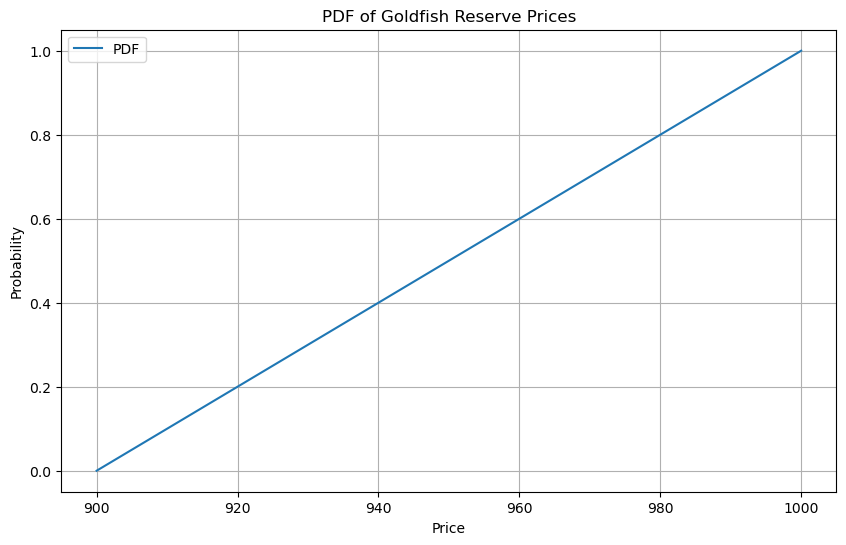

In [1]:
import numpy as np
import matplotlib.pyplot as plt

SELL_PRICE = 1000  # sell price at end is 1000
GOLD_FISH_NUM = 100  # number of goldfish
LOWEST_BID = 900  # lowest bid price
HIGHEST_BID = 1000  # highest bid price
GRANULARITY = 1  # granularity of bid price

# price range
prices = np.arange(LOWEST_BID, HIGHEST_BID + GRANULARITY, GRANULARITY)
# linear prob
probabilities = np.linspace(0, 1, len(prices))

# visualize pdf
plt.figure(figsize=(10, 6))
plt.plot(prices, probabilities, label='PDF')
plt.xlabel('Price')
plt.ylabel('Probability')
plt.title('PDF of Goldfish Reserve Prices')
plt.legend()
plt.grid(True)
plt.show()

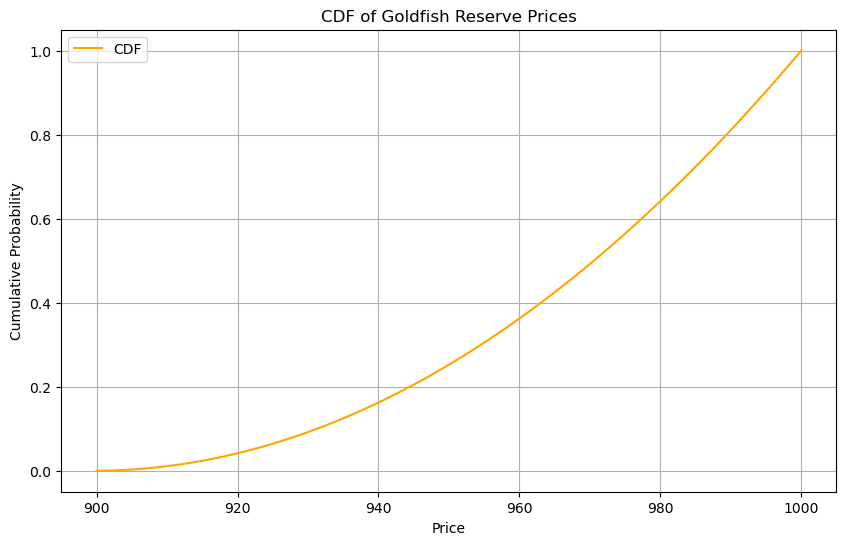

In [2]:
# calculate cdf
cdf = np.cumsum(probabilities) / sum(probabilities)

# visualize cdf
plt.figure(figsize=(10, 6))
plt.plot(prices, cdf, label='CDF', color='orange')
plt.xlabel('Price')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Goldfish Reserve Prices')
plt.legend()
plt.grid(True)
plt.show()


Optimal bid price: 966, Maximum Profit: 1488.5940594059405


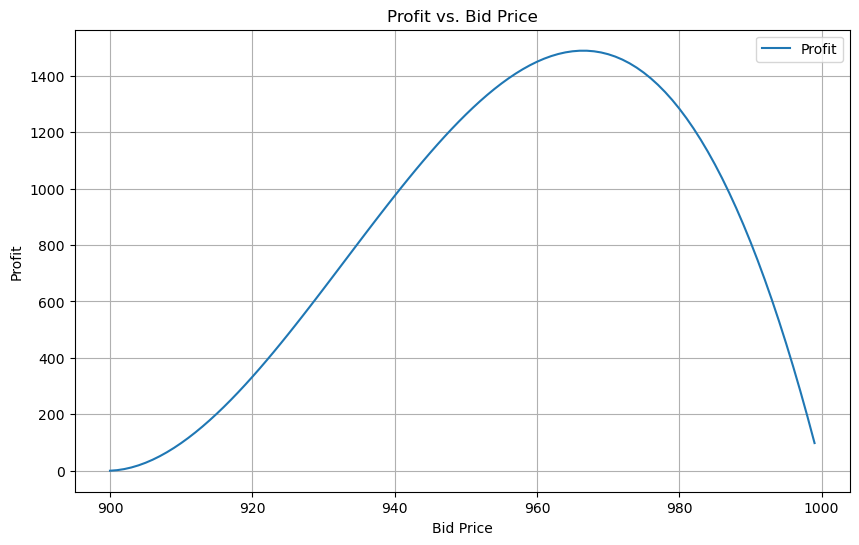

In [3]:
# single bid price

def calculate_profit(bid_price, sell_price=SELL_PRICE):
    # find the index of bid price in prices
    index = np.where(prices == bid_price)[0][0]
    # sell probability is the cdf at index
    sell_probability = cdf[index]
    # expected volume is the sell probability times 100
    expected_volume = sell_probability * GOLD_FISH_NUM
    # profit is the difference between sell price and bid price times expected volume
    profit = (sell_price - bid_price) * expected_volume
    return profit

# try different bid prices and calculate profit
bid_prices = np.arange(LOWEST_BID, HIGHEST_BID, GRANULARITY)
profits = [calculate_profit(bid) for bid in bid_prices]

# max profit and optimal bid price
max_profit = max(profits)
optimal_bid = bid_prices[profits.index(max_profit)]

print(f"Optimal bid price: {optimal_bid}, Maximum Profit: {max_profit}")

# visualize profit vs. bid price
plt.figure(figsize=(10, 6))
plt.plot(bid_prices, profits, label='Profit')
plt.xlabel('Bid Price')
plt.ylabel('Profit')
plt.title('Profit vs. Bid Price')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
# multiple bid prices (2)

def calculate_combined_profit(bid_low, bid_high, sell_price=SELL_PRICE):
    index_low = np.where(prices >= bid_low)[0][0]
    index_high = np.where(prices >= bid_high)[0][0]
    # probability of low price transaction
    sell_probability_low = cdf[index_low]
    # probability of high price transaction
    sell_probability_high = cdf[index_high] - sell_probability_low
    # expected volume
    expected_volume_low = sell_probability_low * GOLD_FISH_NUM
    expected_volume_high = sell_probability_high * GOLD_FISH_NUM
    total_volume = expected_volume_low + expected_volume_high
    # profit
    profit_low = (sell_price - bid_low) * expected_volume_low
    profit_high = (sell_price - bid_high) * expected_volume_high
    total_profit = profit_low + profit_high

    return total_profit, total_volume

# O(n^2) brute force search
max_profit = 0
optimal_bid_low = 0
optimal_bid_high = 0
for bid_low in np.arange(LOWEST_BID, 966, GRANULARITY):  # set middle point as 966 as its the highest profit for single bid
    for bid_high in np.arange(bid_low + GRANULARITY, HIGHEST_BID, GRANULARITY): 
        profit, _ = calculate_combined_profit(bid_low, bid_high)
        if profit > max_profit:
            max_profit = profit
            optimal_bid_low = bid_low
            optimal_bid_high = bid_high

print(f"Optimal bid_low: {optimal_bid_low}, bid_high: {optimal_bid_high}, Maximum Profit: {max_profit}")

Optimal bid_low: 952, bid_high: 978, Maximum Profit: 2051.6831683168316
